In [1]:
import numpy as np 
import pandas as pd
from PIL import Image

In [ ]:
#Membaca CSV

In [2]:
df_london = pd.read_csv(r"C:\Users\Novika Grasiaswaty\Google Drive\Novika Grasiaswaty (NG)\Python\london_crime_by_lsoa.csv", sep = ",")

In [3]:
df_london.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [49]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [56]:
df_london.get_dtype_counts()

int64     3
object    4
dtype: int64

In [58]:
df_london.loc[2005:, 'year'].head(20)

2005    2009
2006    2008
2007    2010
2008    2010
2009    2015
2010    2014
2011    2014
2012    2009
2013    2008
2014    2008
2015    2015
2016    2009
2017    2012
2018    2013
2019    2016
2020    2011
2021    2009
2022    2012
2023    2009
2024    2012
Name: year, dtype: int64

In [59]:
print(df_london.shape)

(13490604, 7)


In [66]:
df_london.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [67]:
df_london.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [55]:
df_london.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [11]:
import matplotlib as mpl

In [12]:
import matplotlib.pyplot as plt

In [21]:
df_london.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [112]:
#Mencari value dalam major category 
df_london['major_category'].value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

In [120]:
#Insight 1 --> Theft and Handling adalah major category tertinggi secara kesuluruhan 
#Tujuan Pertama : Melihat trend untuk Theft and Handling pada 2011 - 2016 pada Borough Tertentu


In [225]:
Pencurian = df_london[df_london ["major_category"].isin(["Theft and Handling"])]

In [219]:
Pencurian.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
10,E01001985,Haringey,Theft and Handling,Motor Vehicle Interference & Tampering,0,2013,12
14,E01002398,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5


In [220]:
Pencurian.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490593,E01004531,Wandsworth,Theft and Handling,Handling Stolen Goods,0,2014,12
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,E01000588,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2


In [226]:
#Pengambilan Kolom Tertentu yang akan Dijadikan Analisis Lebih Jauh
Pencurian.drop('lsoa_code', inplace=True, axis=1)
Pencurian.drop('minor_category', inplace=True, axis=1)
Pencurian.drop('month', inplace=True, axis=1)


In [230]:
Pencurian.head()

,borough,major_category,value,year
5,Ealing,Theft and Handling,0,2012
9,Sutton,Theft and Handling,1,2016
10,Haringey,Theft and Handling,0,2013
14,Hillingdon,Theft and Handling,0,2016
16,Barking and Dagenham,Theft and Handling,1,2009


In [231]:
#Persiapan Plot 
Pencurian_plot = Pencurian.groupby(["borough","year"])["value"].sum().reset_index()


In [232]:
Pencurian_plot.head()

,borough,year,value
0,Barking and Dagenham,2008,5354
1,Barking and Dagenham,2009,5384
2,Barking and Dagenham,2010,5805
3,Barking and Dagenham,2011,6070
4,Barking and Dagenham,2012,6173


In [238]:
Pencurian_plot2 = Pencurian_plot.reset_index().pivot(columns='year', index='borough', values='value')

In [239]:
Pencurian_plot2.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,5354,5384,5805,6070,6173,6140,5289,5177,5607
Barnet,9872,9441,9582,9952,10451,9958,9094,9204,9731
Bexley,5236,4793,4514,3979,4414,4293,4285,4165,4392
Brent,7206,7659,7932,8398,8338,7776,7721,8467,9026
Bromley,8809,7641,7312,7680,7929,7725,7489,7573,7584


Fokus ANALISIS PADA BOROUGH TERTENTU (MISALNYA 3 ABJAD PERTAMA

In [241]:
Pencurian_plot3 = Pencurian_plot2.head(3)

In [242]:
Pencurian_plot3

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,5354,5384,5805,6070,6173,6140,5289,5177,5607
Barnet,9872,9441,9582,9952,10451,9958,9094,9204,9731
Bexley,5236,4793,4514,3979,4414,4293,4285,4165,4392


In [255]:
#Melakukan transpose 
Transpose_Pencurian_Plot3 = Pencurian_plot3.T


In [256]:
Transpose_Pencurian_Plot3 

borough,Barking and Dagenham,Barnet,Bexley
year,,,
2008,5354,9872,5236
2009,5384,9441,4793
2010,5805,9582,4514
2011,6070,9952,3979
2012,6173,10451,4414
2013,6140,9958,4293
2014,5289,9094,4285
2015,5177,9204,4165
2016,5607,9731,4392


In [ ]:
HISTOGRAM
    Pertanyaan : Bagaimana kecenderungan kasus Theft pada 3 Borough? 

Text(0.5, 0, 'Tahun')

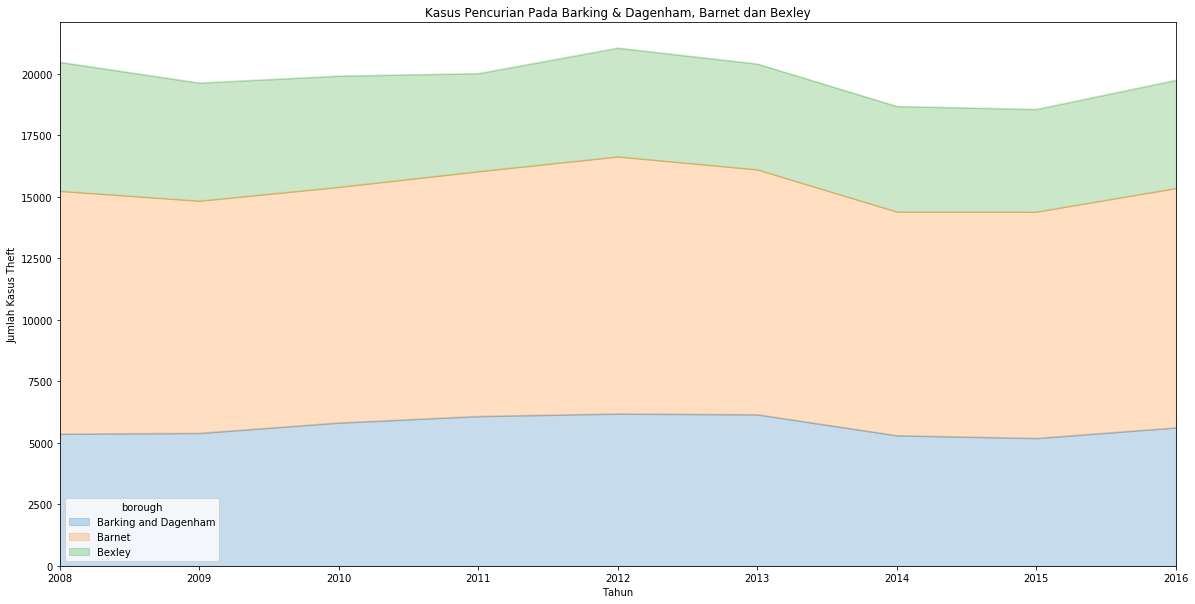

In [263]:
Transpose_Pencurian_Plot3.plot(kind='area',
              stacked=True,
              figsize=(20,10),
               alpha=0.25,
              )

plt.title('Kasus Pencurian Pada Barking & Dagenham, Barnet dan Bexley')
plt.ylabel('Jumlah Kasus Theft')
plt.xlabel('Tahun')

HISTOGRAM 


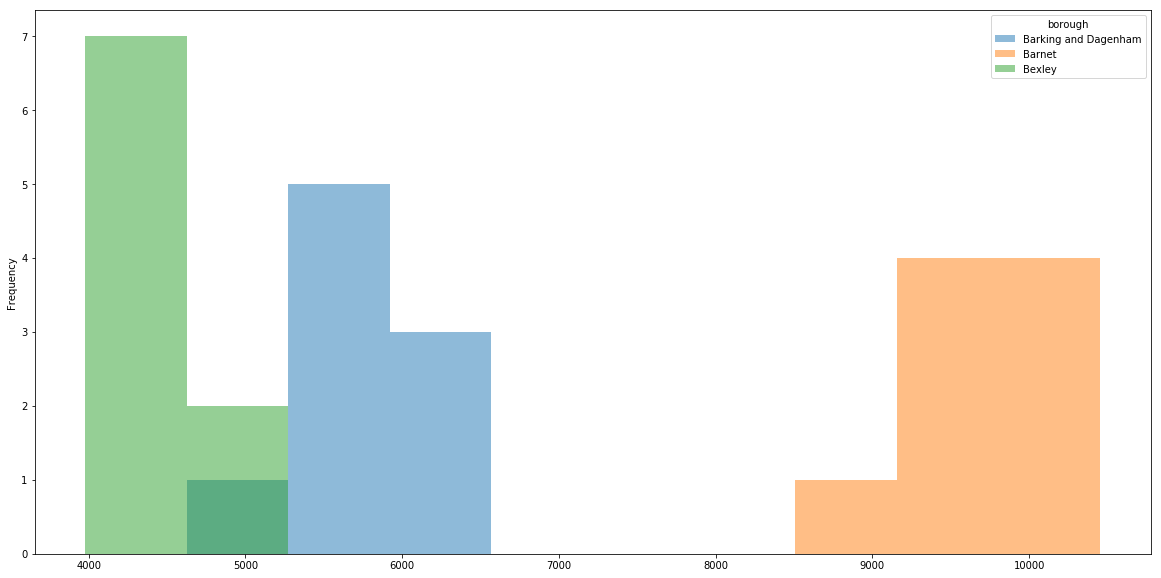

In [265]:
Transpose_Pencurian_Plot3.plot(kind='hist',stacked=False, alpha=0.5, figsize=(20,10))

BAR CHART 
BAGAIMANA TREND KASUS PADA KETIGA DAERAH TERSEBUT? 

<function matplotlib.pyplot.show(*args, **kw)>

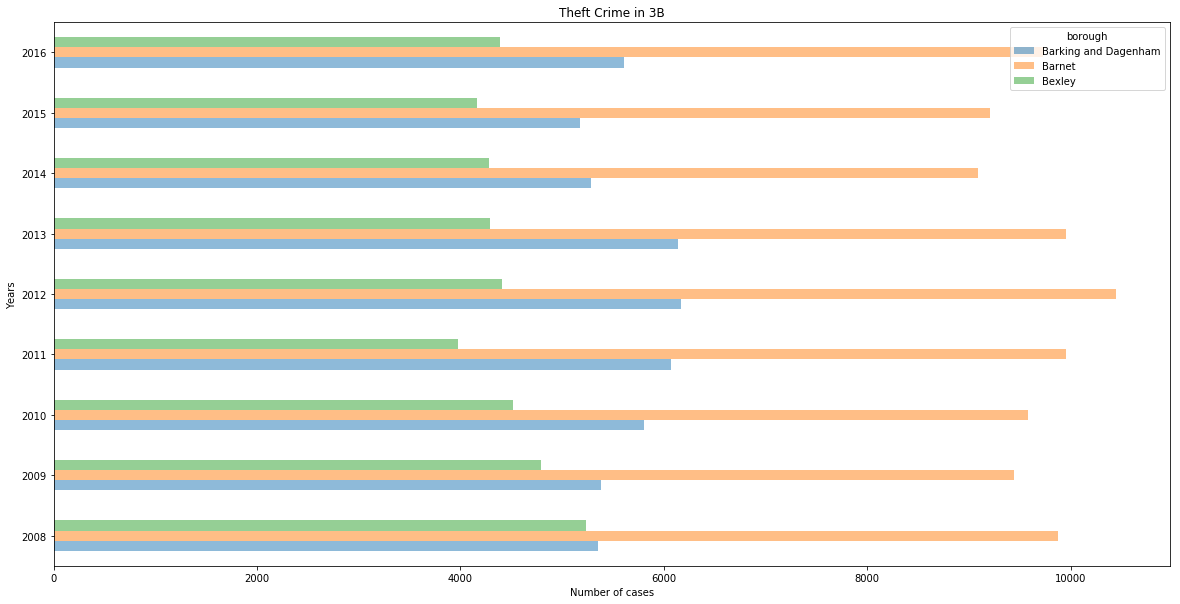

In [267]:
Transpose_Pencurian_Plot3.plot(kind='barh',stacked=False, alpha=0.5, figsize=(20,10))

plt.title('Theft Crime in 3B')
plt.xlabel('Number of cases')
plt.ylabel('Years')
plt.show

PIE CHART
Bagaimanakah Presentase/Perbandingan Pencurian ke 3 Daerah tersebut dalam sebuah PIE CHART

In [273]:
Pencurian_plot3

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,5354,5384,5805,6070,6173,6140,5289,5177,5607
Barnet,9872,9441,9582,9952,10451,9958,9094,9204,9731
Bexley,5236,4793,4514,3979,4414,4293,4285,4165,4392


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F026223E10>,
      dtype=object)

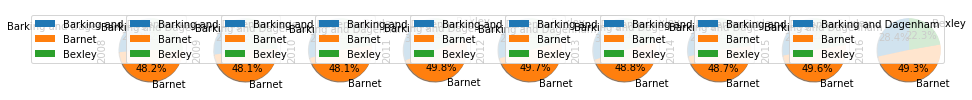

In [280]:
Pencurian_plot3.groupby(['borough']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0262235C0>],
      dtype=object)

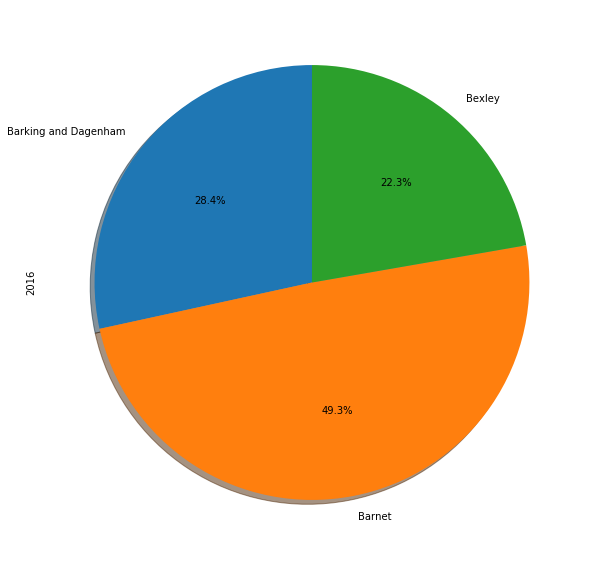

In [281]:
#Data ternyata menjadi tidak beraturan. Mari DIjadikan Lebih Spesifik. Misalnya pada tahun terakhir (2016)

Pencurian_plot3[2016].groupby(['borough']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

BOX PLOT 

Bagaimana perbandingan kasus antara ke tiga daerah? 


In [282]:
Transpose_Pencurian_Plot3

borough,Barking and Dagenham,Barnet,Bexley
year,,,
2008,5354,9872,5236
2009,5384,9441,4793
2010,5805,9582,4514
2011,6070,9952,3979
2012,6173,10451,4414
2013,6140,9958,4293
2014,5289,9094,4285
2015,5177,9204,4165
2016,5607,9731,4392


Text(0, 0.5, 'Kasus Total 2011-2016')

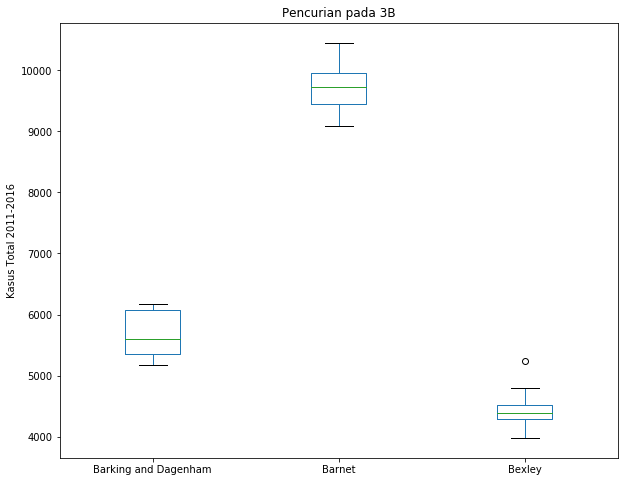

In [284]:
Transpose_Pencurian_Plot3.plot(kind="box", figsize=(10,8))
plt.title("Pencurian pada 3B")
plt.ylabel("Kasus Total 2011-2016")

SCATTER PLOT

Text(0.5, 1.0, 'Perbandingan Kasus Barnet dan Bexley')

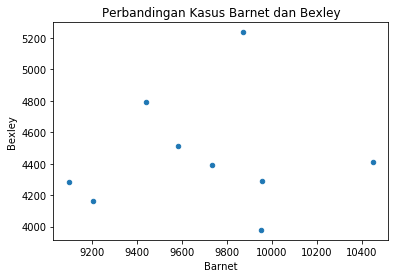

In [289]:
Transpose_Pencurian_Plot3.plot(kind="scatter", x="Barnet", y= "Bexley")

plt.title("Perbandingan Kasus Barnet dan Bexley")

WORDCLOUD

Pertanyaan : Daerah yang paling Banyak Major Criminal di Tahun 2016

In [290]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [294]:
stopwords = set(STOPWORDS)

In [300]:
Kriminalitas = df_london[(df_london['year']) & (df_london['borough'] == 'Bexley')]['major_category'].str.cat(sep=' ')

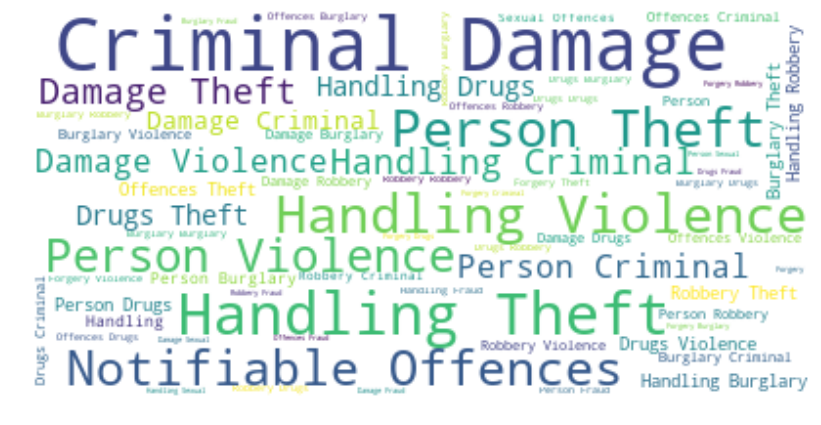

In [301]:

crimes_wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
crimes_wordcloud.generate(wc_crimes)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(crimes_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()